In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

dt_classifier = DecisionTreeClassifier(random_state=10)
dt_classifier.fit(X, y)

DecisionTreeClassifier(random_state=10)

In [4]:
tree_text = export_text(dt_classifier, feature_names=iris.feature_names)
print(tree_text)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



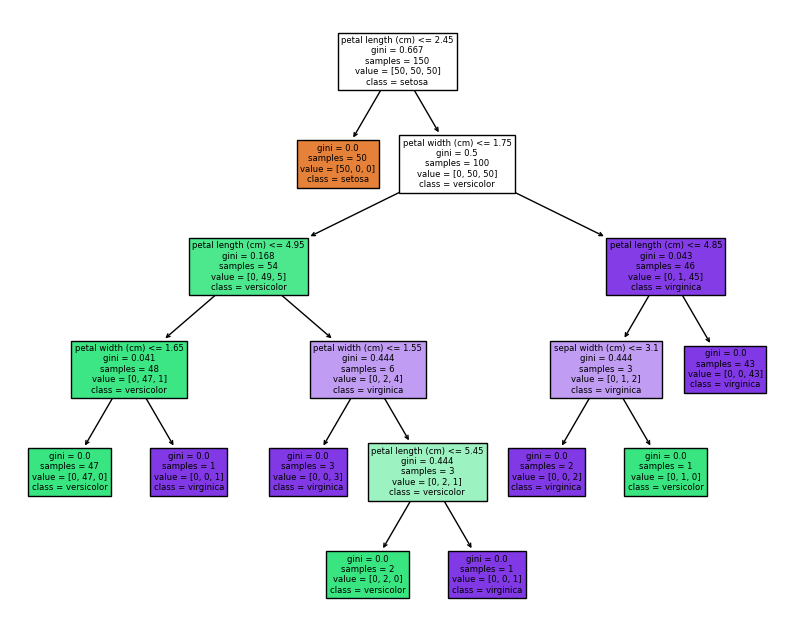

In [5]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 8))
plot_tree(dt_classifier, feature_names=iris.feature_names, class_names=list(iris.target_names), filled=True)
plt.show()

In [6]:
dt_classifier_entropy = DecisionTreeClassifier(criterion='entropy')
dt_classifier_entropy.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [10]:
tree_text = export_text(dt_classifier_entropy, feature_names=iris.feature_names)
print(tree_text)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



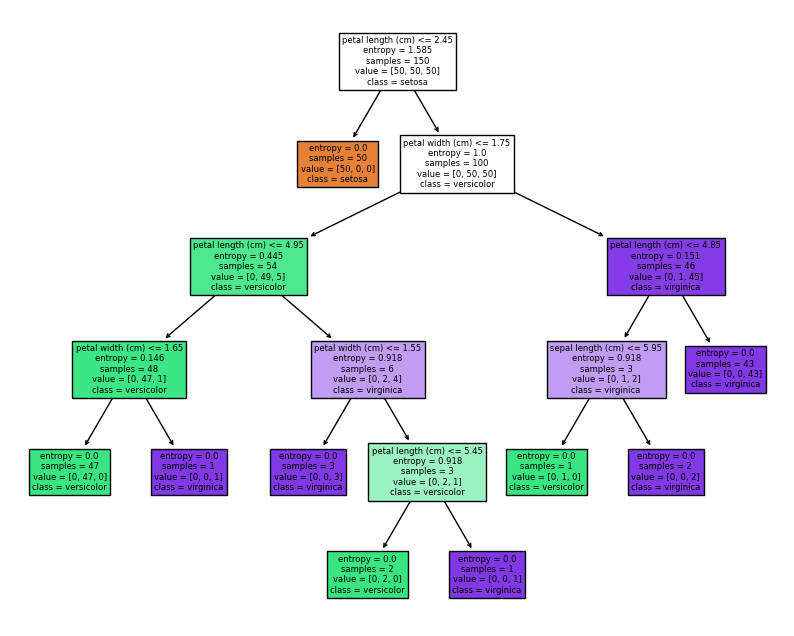

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 8))
plot_tree(dt_classifier_entropy, feature_names=iris.feature_names, class_names=list(iris.target_names), filled=True)
plt.show()

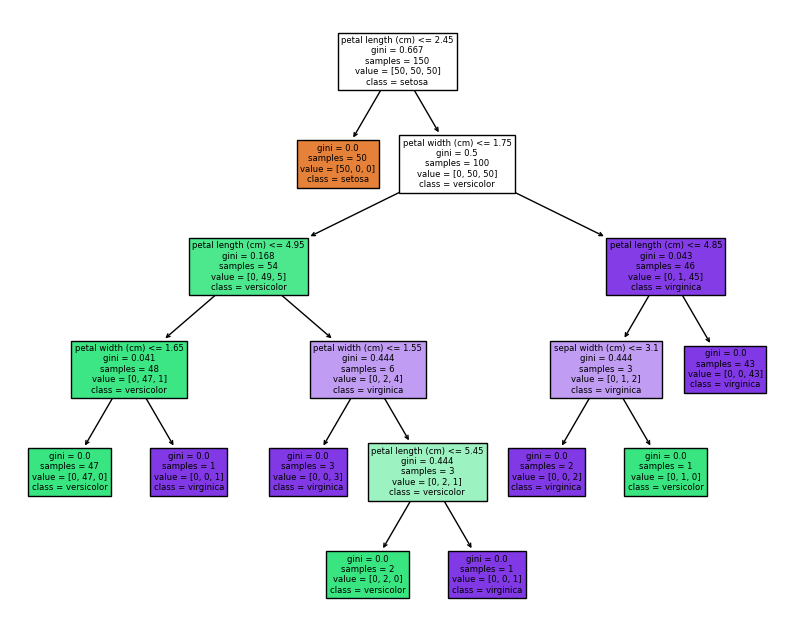

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 8))
plot_tree(dt_classifier, feature_names=iris.feature_names, class_names=list(iris.target_names), filled=True)
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [18]:
def calculate_accuracy(max_depth, criterion):
    dt_classifier = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, random_state=42)
    
    dt_classifier.fit(X_train, y_train) 
    
    y_train_pred = dt_classifier.predict(X_train)
    y_test_pred = dt_classifier.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    return train_accuracy, test_accuracy

In [36]:
max_depths = [2, 3, 4, 5, 6, 7]
criterions = ['gini', 'entropy'] 

train_accuracies_gini =  []
train_accuracies_entropy =  []
test_accuracies_gini  =  []
test_accuracies_entropy  =  []

for criterion in criterions : 
    for max_depth in max_depths:
        train_accuracy, test_accuracy = calculate_accuracy(max_depth, criterion)
        if criterion == 'gini' : 
            train_accuracies_gini.append(train_accuracy)
            test_accuracies_gini.append( test_accuracy )
        else :
            train_accuracies_entropy.append(train_accuracy)
            test_accuracies_entropy.append( test_accuracy )

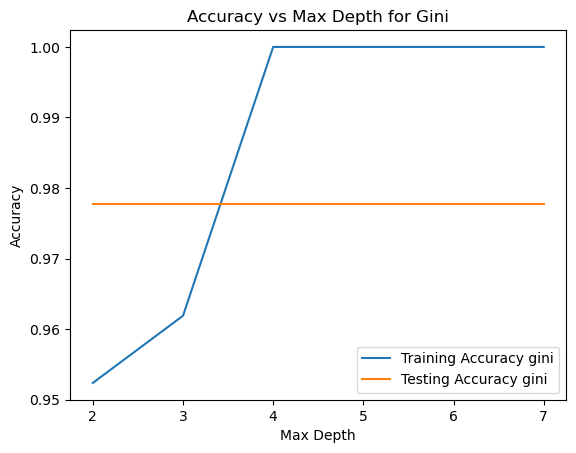

In [37]:
import matplotlib.pyplot as plt

plt.plot(max_depths, train_accuracies_gini, label='Training Accuracy gini')
plt.plot(max_depths, test_accuracies_gini, label='Testing Accuracy gini')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth for Gini')
plt.legend()
plt.show()

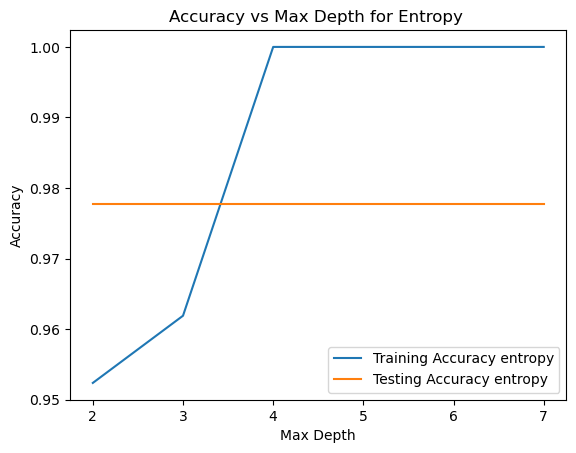

In [38]:
import matplotlib.pyplot as plt

plt.plot(max_depths, train_accuracies_entropy, label='Training Accuracy entropy')
plt.plot(max_depths, test_accuracies_entropy, label='Testing Accuracy entropy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth for Entropy ')
plt.legend()
plt.show()

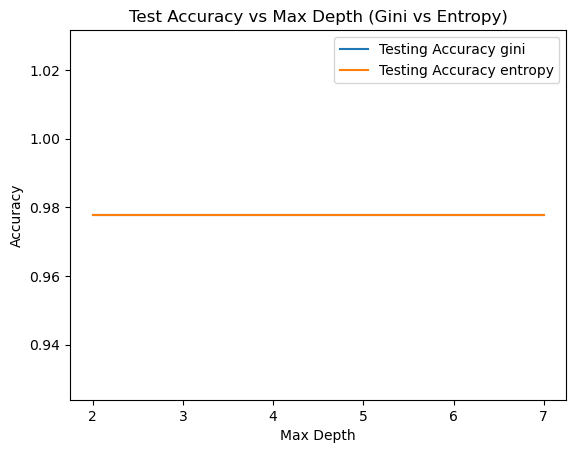

In [39]:
import matplotlib.pyplot as plt

plt.plot(max_depths, test_accuracies_gini, label='Testing Accuracy gini')
plt.plot(max_depths, test_accuracies_entropy, label='Testing Accuracy entropy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Test Accuracy vs Max Depth (Gini vs Entropy)')
plt.legend()
plt.show()

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': max_depths
}

dt_classifier = DecisionTreeClassifier()

grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'criterion': 'gini', 'max_depth': 2}
Best Score: 0.9333333333333332


# Decision Tree Notions and Concepts

A decision tree is a supervised machine learning algorithm that is commonly used for classification and regression tasks. It is a tree-like model where each internal node represents a feature or attribute, each branch represents a decision rule, and each leaf node represents the outcome or prediction.

## Key Terminology

### Root Node
The root node is the topmost node in the decision tree. It represents the entire dataset and is split into two or more child nodes based on a selected feature.

### Internal Nodes
Internal nodes are the intermediate nodes in the decision tree. They represent the features or attributes used for splitting the data.

### Leaf Nodes
Leaf nodes are the terminal nodes in the decision tree. They represent the final outcome or prediction.

### Splitting
Splitting is the process of dividing the dataset into subsets based on a selected feature. It is done to maximize the homogeneity or purity of the subsets.

### Entropy
Entropy is a measure of impurity or disorder in a dataset. In the context of decision trees, it is used to determine the best feature to split the data. The goal is to minimize the entropy and maximize the information gain.

### Information Gain
Information gain is the reduction in entropy achieved by splitting the data based on a particular feature. It measures the usefulness of a feature in the decision tree.

### Pruning
Pruning is the process of reducing the size of the decision tree by removing unnecessary branches or nodes. It helps to prevent overfitting and improve the generalization ability of the model.

### Overfitting
Overfitting occurs when a decision tree captures the noise or random fluctuations in the training data, resulting in poor performance on unseen data. It happens when the tree is too complex and specific to the training data.

### Underfitting
Underfitting occurs when a decision tree fails to capture the underlying patterns or relationships in the training data. It happens when the tree is too simple and unable to represent the complexity of the data.

## Advantages of Decision Trees

- Decision trees are easy to understand and interpret, making them suitable for explaining the decision-making process.
- They can handle both categorical and numerical data.
- Decision trees can handle missing values and outliers.
- They can be used for both classification and regression tasks.
- Decision trees can handle non-linear relationships between features and the target variable.

## Limitations of Decision Trees

- Decision trees are prone to overfitting, especially when the tree becomes too complex.
- They can be sensitive to small changes in the data, leading to different tree structures.
- Decision trees can be biased towards features with more levels or categories.
- They may not perform well on imbalanced datasets.
- Decision trees are not suitable for problems with continuous target variables.

In conclusion, decision trees are powerful and versatile machine learning models that can be used for a wide range of tasks. Understanding the key concepts and notions associated with decision trees is essential for effectively using and interpreting these models.

In [29]:
import pandas as pd

data = {
    "Pixel": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    "Texture": [
        "Medium",
        "Fine",
        "Coarse",
        "Fine",
        "Coarse",
        "Medium",
        "Fine",
        "Coarse",
        "Medium",
        "Fine",
        "Medium",
        "Coarse",
        "Fine",
        "Coarse",
        "Coarse",
        "Fine",
    ],
    "Elevation": [
        "High",
        "Low",
        "Low",
        "Medium",
        "High",
        "High",
        "Medium",
        "High",
        "Low",
        "Medium",
        "Low",
        "Low",
        "Medium",
        "High",
        "Medium",
        "High",
    ],
    "Tone": [
        "Dark",
        "Light",
        "Dark",
        "Light",
        "Dark",
        "Dark",
        "Light",
        "Dark",
        "Dark",
        "Light",
        "Dark",
        "Light",
        "Light",
        "Dark",
        "Dark",
        "Light",
    ],
    "Pattern": [
        "Definite",
        "Vague",
        "Definite",
        "Definite",
        "Vague",
        "Definite",
        "Vague",
        "Definite",
        "Vague",
        "Definite",
        "Vague",
        "Vague",
        "Vague",
        "Definite",
        "Definite",
        "Vague",
    ],
    "Land Cover": [
        "Grassland",
        "Grassland",
        "Woodland",
        "Woodland",
        "Woodland",
        "Woodland",
        "Grassland",
        "Woodland",
        "Woodland",
        "Woodland",
        "Grassland",
        "Woodland",
        "Grassland",
        "Woodland",
        "Woodland",
        "Grassland",
    ],
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

    Pixel Texture Elevation   Tone   Pattern Land Cover
0       1  Medium      High   Dark  Definite  Grassland
1       2    Fine       Low  Light     Vague  Grassland
2       3  Coarse       Low   Dark  Definite   Woodland
3       4    Fine    Medium  Light  Definite   Woodland
4       5  Coarse      High   Dark     Vague   Woodland
5       6  Medium      High   Dark  Definite   Woodland
6       7    Fine    Medium  Light     Vague  Grassland
7       8  Coarse      High   Dark  Definite   Woodland
8       9  Medium       Low   Dark     Vague   Woodland
9      10    Fine    Medium  Light  Definite   Woodland
10     11  Medium       Low   Dark     Vague  Grassland
11     12  Coarse       Low  Light     Vague   Woodland
12     13    Fine    Medium  Light     Vague  Grassland
13     14  Coarse      High   Dark  Definite   Woodland
14     15  Coarse    Medium   Dark  Definite   Woodland
15     16    Fine      High  Light     Vague  Grassland


In [30]:
df_encoded = pd.get_dummies(df.drop( columns = ["Land Cover", "Pixel"] ))
df_encoded.head()

,Texture_Coarse,Texture_Fine,Texture_Medium,Elevation_High,Elevation_Low,Elevation_Medium,Tone_Dark,Tone_Light,Pattern_Definite,Pattern_Vague
0,False,False,True,True,False,False,True,False,True,False
1,False,True,False,False,True,False,False,True,False,True
2,True,False,False,False,True,False,True,False,True,False
3,False,True,False,False,False,True,False,True,True,False
4,True,False,False,True,False,False,True,False,False,True


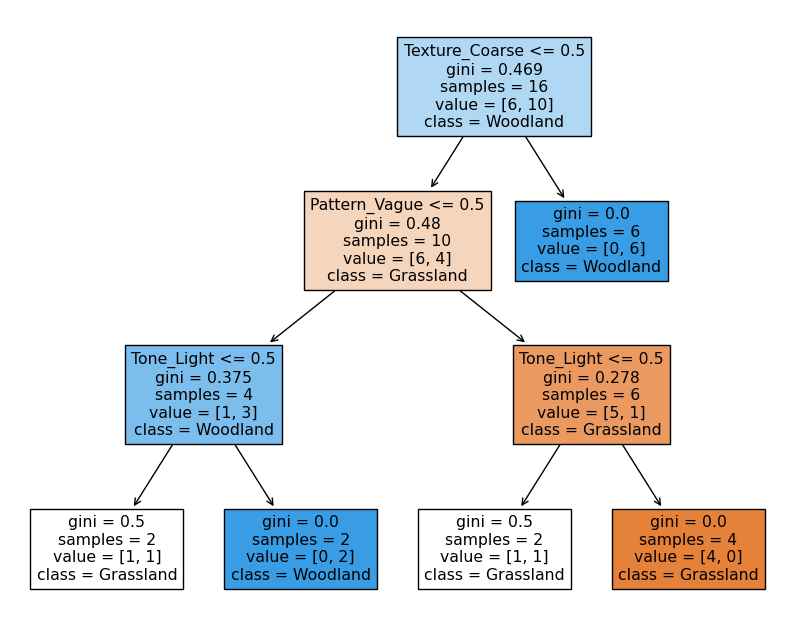

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(df_encoded, df['Land Cover'])

# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(dt_classifier, feature_names=list(df_encoded.columns), class_names=list(df['Land Cover'].unique()), filled=True)
plt.show()

In [32]:
from sklearn.preprocessing import LabelEncoder

df_label_encoded = df.copy()

label_encoder = LabelEncoder()
df_label_encoded['Texture'] = label_encoder.fit_transform(df_label_encoded['Texture'])
df_label_encoded['Elevation'] = label_encoder.fit_transform(df_label_encoded['Elevation'])
df_label_encoded['Tone'] = label_encoder.fit_transform(df_label_encoded['Tone'])
df_label_encoded['Pattern'] = label_encoder.fit_transform(df_label_encoded['Pattern'])

print(df_label_encoded)
print(df)

    Pixel  Texture  Elevation  Tone  Pattern Land Cover
0       1        2          0     0        0  Grassland
1       2        1          1     1        1  Grassland
2       3        0          1     0        0   Woodland
3       4        1          2     1        0   Woodland
4       5        0          0     0        1   Woodland
5       6        2          0     0        0   Woodland
6       7        1          2     1        1  Grassland
7       8        0          0     0        0   Woodland
8       9        2          1     0        1   Woodland
9      10        1          2     1        0   Woodland
10     11        2          1     0        1  Grassland
11     12        0          1     1        1   Woodland
12     13        1          2     1        1  Grassland
13     14        0          0     0        0   Woodland
14     15        0          2     0        0   Woodland
15     16        1          0     1        1  Grassland
    Pixel Texture Elevation   Tone   Pattern Lan

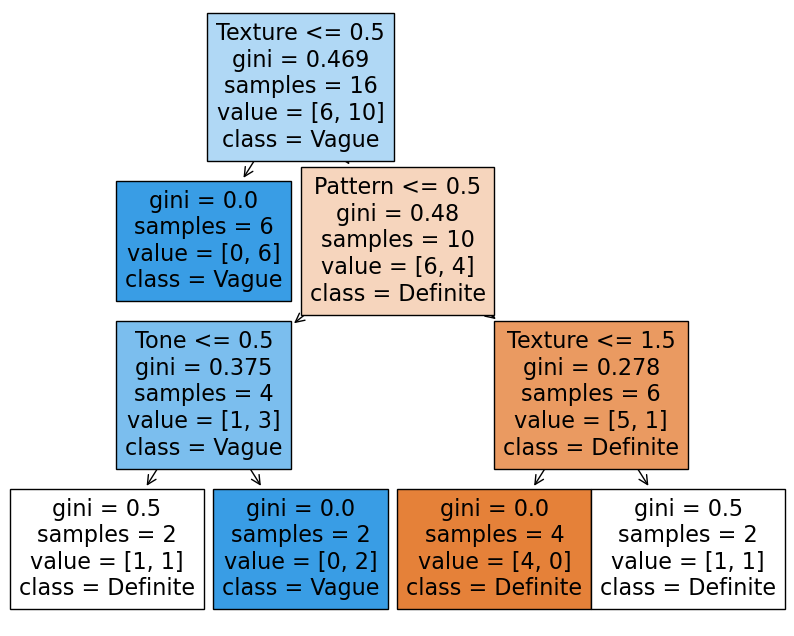

In [33]:
dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(df_label_encoded.drop(columns=['Pixel', 'Land Cover']), df_label_encoded['Land Cover'])

plt.figure(figsize=(10, 8))
plot_tree(dt_classifier, feature_names=list(list(df_label_encoded.drop(columns=['Pixel', 'Land Cover']).columns)), class_names=list(label_encoder.classes_), filled=True)
plt.show()
